```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 2

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 2.1

In this exercise, we estimate the value of
$$I = \int_0^1 f(x) \text dx = 1,$$
where
$$f(x) = \frac{\pi}{2}\cos(\pi x/2).$$

To do so, we use a Monte Carlo method sampling from two different distributions.

In [8]:
# Read parameters from info file
with open("data/2.1-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_throws_per_block = {N_throws_per_block}")

# Read data
data_unif = np.loadtxt("data/2.1-unif.dat")
data_importance = np.loadtxt("data/2.1-importance.dat")

N_blocks = 100
N_throws_per_block = 10000


### Uniform sampling

We sample uniformely distributed values $x_i$ in $[0, 1)$, and use the mean of the $f(x_i)$ as an estimator for the integral.

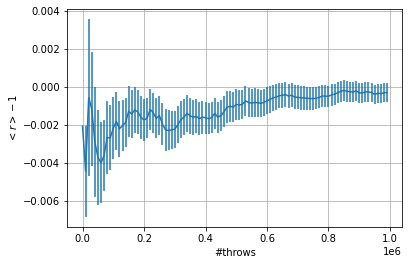

In [9]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data_unif[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-1$")
plt.grid(True)
plt.show()

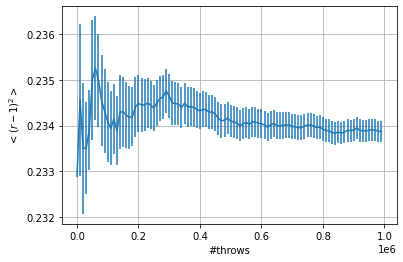

In [10]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data_unif[:, 1])
plt.errorbar(x, y[:, 0], yerr=y[:, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<(r-1)^2>$")
plt.grid(True)
plt.show()

### Importance sampling



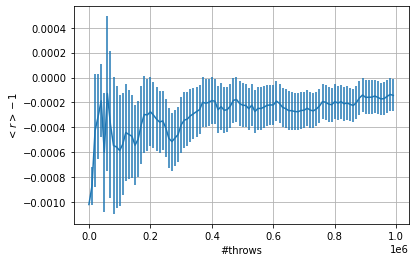

In [11]:
y = blocks_value(data_importance[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-1$")
plt.grid(True)
plt.show()

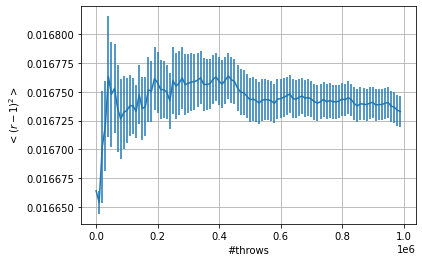

In [12]:
y = blocks_value(data_importance[:, 1])
plt.errorbar(x, y[:, 0], yerr=y[:, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<(r-1)^2>$")
plt.grid(True)
plt.show()

## Exercise 2.2

In this exercise, we simulate a random walk. Since the lattice has $a=1$ and $\tau=1$, the expected distance from the origin is
$$\sqrt{\left<x^2\right>} = \frac{a^2}{\tau} t = t,$$
where $t$ is the number of steps in the RW.

In [15]:
with open("data/2.2-info.dat") as file:
    N_blocks = int(file.readline())
    N_walks_per_block = int(file.readline())
    N_steps_per_walk = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_walks_per_block = {N_walks_per_block}\nN_steps_per_walk = {N_steps_per_walk}")

data_disc = np.loadtxt("data/2.2-disc.dat")
data_cont = np.loadtxt("data/2.2-cont.dat")

N_blocks = 100
N_walks_per_block = 1000
N_steps_per_walk = 10000


### Discrete case

At first, we simulate the discrete case, where at each step the walker moves forwards or backwards (with equal probability) in one of the three $e_i$ directions, chosen at random with equal probability.

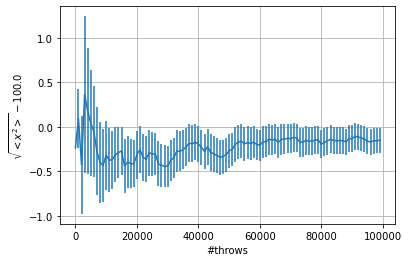

sqrt(<x^2>)-100.0 = -0.15 ± 0.14


In [13]:
x = np.arange(N_blocks) * N_walks_per_block
y = blocks_value(data_disc)
expected = np.sqrt(N_steps_per_walk)

plt.errorbar(x, y[:,0]-expected, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<x^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<x^2>)-{expected} = {y[-1,0]-expected:.2f} ± {y[-1,1]:.2f}")

### Continuous case

Then, we simulate a continuous RW, where the walker samples uniformely a random direction in the 3D space, and moves by a fixed amount $a$ in that direction.

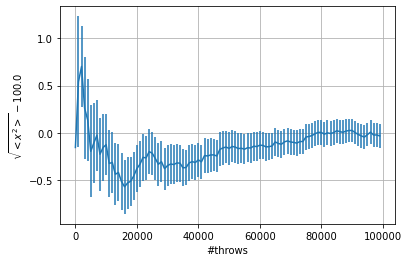

sqrt(<x^2>)-100.0 = -0.03 ± 0.13


In [16]:
x = np.arange(N_blocks) * N_walks_per_block
y = blocks_value(data_cont)
expected = np.sqrt(N_steps_per_walk)

plt.errorbar(x, y[:,0]-expected, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<x^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<x^2>)-{expected} = {y[-1,0]-expected:.2f} ± {y[-1,1]:.2f}")